In [1]:
from __future__ import print_function

# Handle data
import json
import operator
import collections
import re

# Handle table-like data 
import numpy as np
import pandas as pd

# Model Algorithms
# we could use also tensor flow, there are multiple implementations of word2vec
from gensim.models import word2vec

# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

C:\Users\chosun\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Load the dataset
# json format labels: cuisine, id number and ingredients (list)
trainrecipts = json.load(open('./train.json','r', encoding='UTF8'))

In [3]:
# Quick&dirty code to extract info2list
raw_ingredients = list()

for recipt in trainrecipts:
    for ingredient in recipt[u'ingredients']:
        raw_ingredients.append(ingredient.strip())
        

raw_cuisines = list()
for recipt in trainrecipts:
    raw_cuisines.append(recipt[u'cuisine'].strip())

In [4]:
# use Counter to get frequencies 
counts_ingr = collections.Counter(raw_ingredients)
counts_cuis = collections.Counter(raw_cuisines)

In [5]:
# this will help us to have an idea how our corpora of 
# ingredients looks like
print('Size Ingredients dataset (with repetition):  \t{}'.format((len(raw_ingredients))))
print('Unique Ingredients dataset: \t\t\t{}'.format((len(counts_ingr.values()))))

# This will provide a distribution of cusines, indirect 
# info of the ingredients
print('Total # of recipts \t\t\t\t{}'.format(len(raw_cuisines)))
print('Total # of Cuisines \t\t\t\t{}'.format((len(counts_cuis.values()))))

Size Ingredients dataset (with repetition):  	428275
Unique Ingredients dataset: 			6714
Total # of recipts 				39774
Total # of Cuisines 				20


In [6]:
# top 10
counts_cuis.most_common(10)

[('italian', 7838),
 ('mexican', 6438),
 ('southern_us', 4320),
 ('indian', 3003),
 ('chinese', 2673),
 ('french', 2646),
 ('cajun_creole', 1546),
 ('thai', 1539),
 ('japanese', 1423),
 ('greek', 1175)]

In [7]:
# Distribution 

print(np.mean(list(counts_cuis.values())))
print(np.std(list(counts_cuis.values())))

1988.7
1989.865349715905


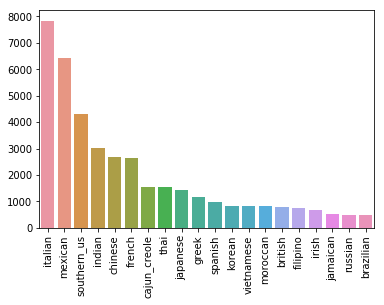

In [8]:
# lets plot this 
# sort
x_cu = [cu for cu, frq in counts_cuis.most_common()]
y_frq = [frq for cu, frq in counts_cuis.most_common()]
fbar = sns.barplot(x = x_cu, y = y_frq)
# xlabels
for item in fbar.get_xticklabels():
    item.set_rotation(90)

In [9]:
# init a dict with a empty list
num_ingredients = dict(zip(counts_cuis.keys(), [list() for x in counts_cuis.keys()]))
for recipt in trainrecipts:
    # append the number in the list
    num_ingredients[recipt['cuisine']].append(len(recipt['ingredients']))

len(num_ingredients)

20

In [10]:
for cu, frq in num_ingredients.items():

    print('{}    \t\t{:.2f}'.format(cu, np.mean(frq)))

greek    		10.18
southern_us    		9.63
filipino    		10.00
indian    		12.71
jamaican    		12.21
spanish    		10.42
italian    		9.91
mexican    		10.88
chinese    		11.98
british    		9.71
thai    		12.55
vietnamese    		12.68
cajun_creole    		12.62
brazilian    		9.52
french    		9.82
japanese    		9.74
irish    		9.30
korean    		11.28
moroccan    		12.91
russian    		10.22


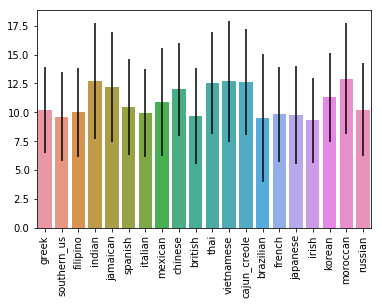

In [11]:
x_cu = [cu for cu, frq in num_ingredients.items()]
y_frq = [np.mean(frq) for cu, frq in num_ingredients.items()]
err = [np.std(frq) for cu, frq in num_ingredients.items()]
fbar = sns.barplot(x = x_cu, y = y_frq, yerr=err)
# xlabels
for item in fbar.get_xticklabels():
    item.set_rotation(90)

In [12]:
# Dispersion of the frequencies Ingredients
print(np.mean(list(counts_ingr.values())))
print(np.std(list(counts_ingr.values())))

63.7883526958594
388.3270259662557


In [13]:
# This is to big to plot, let's check the percentiles
print(np.median(list(counts_ingr.values())))
print(np.percentile(list(counts_ingr.values()), [25., 50., 75., 99.]))

4.0
[1.00000e+00 4.00000e+00 2.00000e+01 1.15644e+03]


In [14]:
# top 15
counts_ingr.most_common(15)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113)]

In [15]:
# Tail 50
counts_ingr.most_common()[-50:]

[('tonic water', 1),
 ('Chartreuse Liqueur', 1),
 ('aloe juice', 1),
 ('salt free chili powder', 1),
 ('tofu sour cream', 1),
 ('spicy salami', 1),
 ('Honeysuckle White® Hot Italian Turkey Sausage Links', 1),
 ('chocolate extract', 1),
 ('chocolate graham crackers', 1),
 ('cumberland sausage', 1),
 ('cocktail pumpernickel bread', 1),
 ('chunky tomatoes', 1),
 ("Colman's Mustard Powder", 1),
 ('manouri', 1),
 ('cherry vanilla ice cream', 1),
 ('bone-in ribeye steak', 1),
 ('frozen lemonade concentrate, thawed and undiluted', 1),
 ('flowering chinese chives', 1),
 ('praline topping', 1),
 ('riblets', 1),
 ('puff paste', 1),
 ('Barilla Plus Pasta', 1),
 ('turkey giblet stock', 1),
 ('light chicken stock', 1),
 ('conchiglie', 1),
 ('2% milk shredded mozzarella cheese', 1),
 ('Makers Mark Whisky', 1),
 ('knorr pasta side   cheesi cheddar', 1),
 ('whole grain baguette', 1),
 ('reduced sodium ham', 1),
 ('whole wheat peasant bread', 1),
 ('ranch-style seasoning', 1),
 ('ketjap', 1),
 ('chocol

In [16]:
symbols = list()

for recipt in trainrecipts:

    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        if re.match("\(|@|\$\?", ingredient.lower()):
            symbols.append(ingredient)
len(symbols)
counts_symbols = collections.Counter(symbols)
counts_symbols.most_common(20)

[('(    oz.) tomato sauce', 11),
 ('(   oz.) tomato paste', 9),
 ('(14.5 oz.) diced tomatoes', 3),
 ('(15 oz.) refried beans', 3),
 ('(10 oz.) frozen chopped spinach', 3),
 ('(10 oz.) frozen chopped spinach, thawed and squeezed dry', 2),
 ('(14 oz.) sweetened condensed milk', 2)]

In [17]:
sentences = list()
# one hot ingredients


for recipt in trainrecipts:
    clean_recipt = list()
    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        # remove this description from the ingredients
        # minimal preprocessing
        ingredient =  re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|powder|chopped|sliced',
                             '', 
                             ingredient)
        clean_recipt.append(ingredient.strip())
    sentences.append(clean_recipt)
        
len(sentences)

39774

In [18]:
# Set values for NN parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 3    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [19]:
model.most_similar(u'feta cheese')

C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\chosun\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kalamata', 0.9442077279090881),
 ('pitted kalamata olives', 0.9129999876022339),
 ('fresh oregano', 0.9088729023933411),
 ('olives', 0.9033201336860657),
 ('grape tomatoes', 0.8903462886810303),
 ('roasted red peppers', 0.8870916962623596),
 ('plum tomatoes', 0.8858009576797485),
 ('pitas', 0.8777855038642883),
 ('cherry tomatoes', 0.8756405115127563),
 ('red wine vinegar', 0.8695276975631714)]

In [20]:
model.similarity('broccoli', 'bacon')

C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.43208557

In [21]:
model.similarity('broccoli', 'carrots')

C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.64215046

In [22]:
model.similarity('broccoli', u'mushrooms')

C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.85174096

In [23]:
#['garlic', 'onion'], ['olive oil']
x = 'basil'
b= 'tomato sauce'
a = 'pasta'
predicted = model.most_similar([x, b], [a])[0][0]
print(" {} is to  {} as {} is to {} ".format(a, b, x, predicted))

 pasta is to  tomato sauce as basil is to lean  meat 


C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [24]:
#['garlic', 'onion'], ['olive oil']
x = 'chicken'
b= 'broccoli'
a = 'bacon'
predicted = model.most_similar([x, b], [a])[0][0]
print(" {} is to  {} as {} is to {} ".format(a, b, x, predicted))

 bacon is to  broccoli as chicken is to chili paste 


C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [25]:
model.wv.most_similar_cosmul(positive=['chili', u'meat'], negative=['tomato sauce'])

[('small green chile', 1.243143916130066),
 ('coconut oil', 1.209741473197937),
 ('tamarind paste', 1.1976515054702759),
 ('pork shoulder', 1.1963163614273071),
 ('peanut', 1.1958571672439575),
 ('tamarind', 1.1905843019485474),
 ('chiles', 1.183814525604248),
 ('lime', 1.1813783645629883),
 ('tamarind pulp', 1.1792969703674316),
 ('red radishes', 1.177951455116272)]

In [26]:
corpus = sorted(model.wv.vocab.keys()) #not sure the exact api
emb_tuple = tuple([model[v] for v in corpus])
X = np.vstack(emb_tuple)

C:\Users\chosun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [27]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

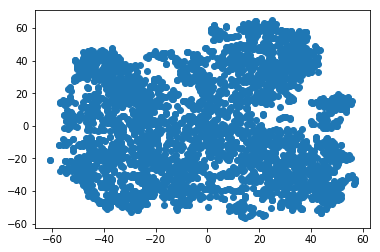

In [28]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [29]:
track_ingredients = dict(zip(counts_cuis.keys(), [list() for x in counts_cuis.keys()]))
for recipt in trainrecipts:
    # append the number in the list
    clean_recipt = list()
    # I want ingredient remove 
    for ingredient in recipt['ingredients']:
        # remove this description from the ingredients
        # (10 oz.) 
        ingredient =  re.sub(r'crushed|crumbles|ground|minced|powder|chopped|sliced', '', ingredient)
        clean_recipt.append(ingredient.strip())
        
    track_ingredients[recipt['cuisine']].extend(clean_recipt)

for label, tracking in track_ingredients.items():
    track_ingredients[label] = collections.Counter(tracking)

In [30]:
def return_most_popular(v):
    cuisine = None
    record = 0
    for label, tracking in track_ingredients.items():
        norm_freq = float(tracking[v]) / float(counts_cuis[label])
        if norm_freq > record:
            cuisine = label
            record = norm_freq
    return cuisine

In [31]:
track_2color = {u'irish':"#000000", # blak
                u'mexican':"#FFFF00", #yellow
                u'chinese':"#1CE6FF", #cyan
                u'filipino': "#FF34FF", #pink 
                u'vietnamese':"#FF4A46", #red
                u'spanish':"#FFC300",  # green forest
                u'japanese':"#006FA6", # blue ocean
                u'moroccan':"#A30059",# purple
                u'french':"#FFDBE5",  #light pink
                u'greek': "#7A4900",  # gold or brown 
                u'indian':"#0000A6", # blue electric 
                u'jamaican':"#63FFAC", # green phospho
                u'british': "#B79762", #brown
                u'brazilian': "#EEC3FF", #  
                u'russian':"#8FB0FF", # light blue 
                u'cajun_creole':"#997D87", #violet
                u'thai':"#5A0007", 
                u'southern_us':"#809693", 
                u'korean':"#FEFFE6", #ligt yellow
                u'italian':"#1B4400"}

color_vector = list()
for v in corpus:
    cuisine = return_most_popular(v)
    color_vector.append(track_2color[cuisine])

In [32]:
lgend = list()
for l, c in track_2color.items():
    lgend.append(mpatches.Patch(color=c, label=l))

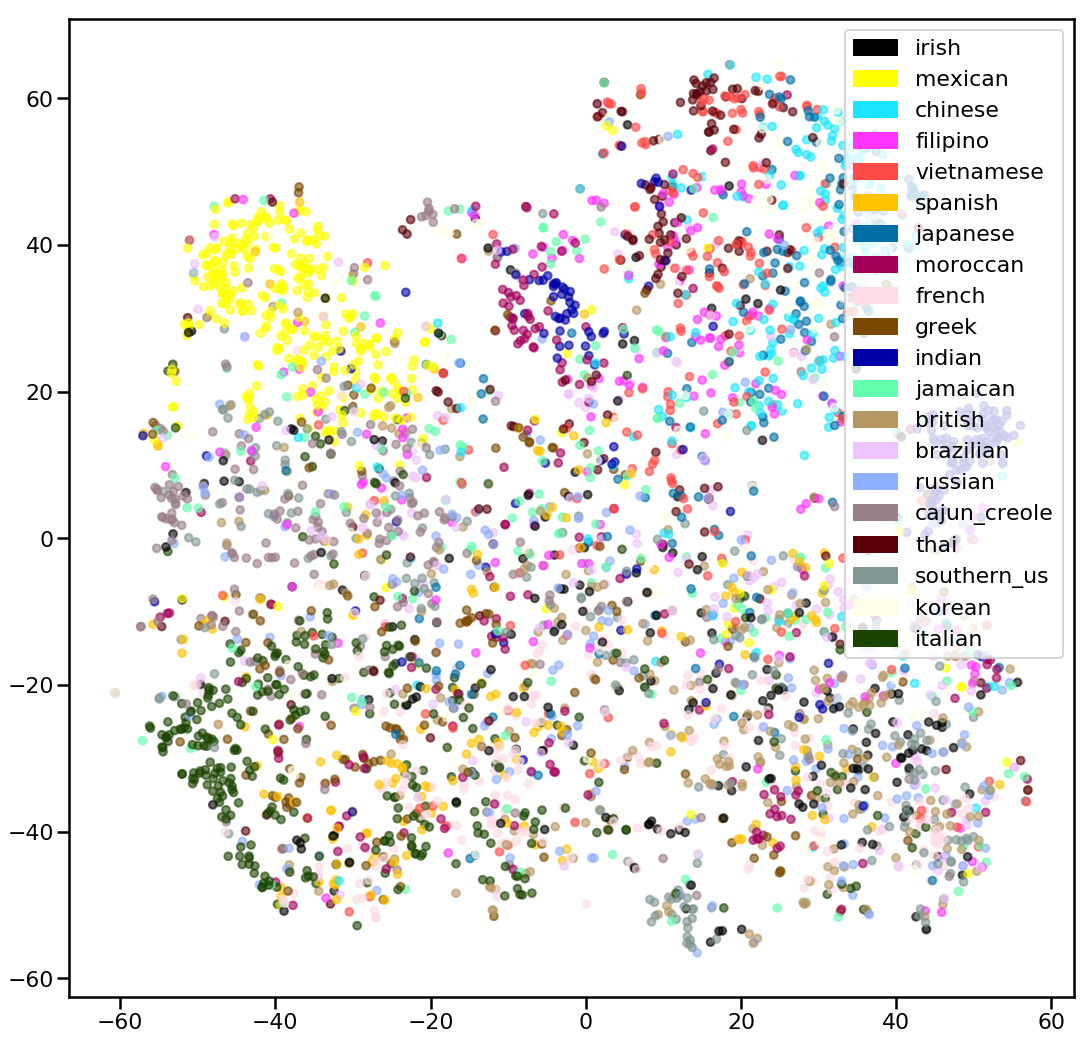

In [33]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector, alpha=.6, s=60)
plt.legend(handles=lgend)